In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

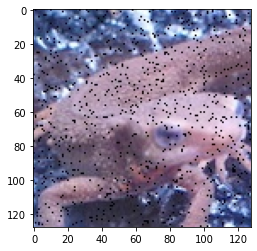

128 128 3


In [2]:
img = cv2.imread("../imori_noise.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
H, W, ch = img.shape
print(H, W, ch)

In [19]:
ksize = 3
sigma = 1.3
gaussian_filter = np.zeros((ksize, ksize))
for i in range(ksize):
    for j in range(ksize):
        x = i - (ksize - 1) // 2
        y = j - (ksize - 1) // 2
        a = -(x*x+y*y)/(2*(sigma**2))
        gaussian_filter[i, j] = 1/(2*np.pi*(sigma**2)) * np.exp(a)

gaussian_filter /= np.sum(gaussian_filter)
print(gaussian_filter)

[[0.08941182 0.12019445 0.08941182]
 [0.12019445 0.16157491 0.12019445]
 [0.08941182 0.12019445 0.08941182]]


In [20]:
output_img = np.zeros(img.shape)
for i in range(H):
    for j in range(W):
        s = np.zeros((1, ch))
        for di in range(ksize):
            for dj in range(ksize):
                x = i + di - (ksize - 1) // 2
                y = j + dj - (ksize - 1) // 2
                if 0 <= x < H and 0 <= y < W:
                    s += gaussian_filter[di, dj] * img[x, y]
        output_img[i, j] = s

output_img = output_img.astype("uint8")

(128, 128, 3)


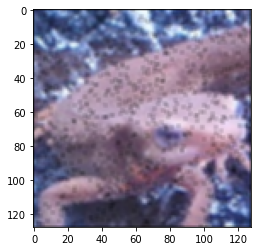

In [21]:
print(output_img.shape)
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()